In [18]:
import yfinance as yf
import pandas as pd

# Download data
apple_data = yf.download('AAPL', start='2021-01-01', end='2023-12-31', interval='1d')
sp500_data = yf.download('^GSPC', start='2021-01-01', end='2023-12-31', interval='1d')
sp500_it_data = yf.download('XLK', start='2021-01-01', end='2023-12-31', interval='1d')  

# Process the data
apple_data['Apple_Returns'] = apple_data['Adj Close'].pct_change()
sp500_data['SP500_Returns'] = sp500_data['Adj Close'].pct_change()
sp500_it_data['SP500_IT_Returns'] = sp500_it_data['Adj Close'].pct_change()

# Combine the data into one dataframe
combined_data = pd.DataFrame({
    'Apple_Returns': apple_data['Apple_Returns'],
    'SP500_Returns': sp500_data['SP500_Returns'],
    'SP500_IT_Returns': sp500_it_data['SP500_IT_Returns']
})

# Drop missing values
combined_data.dropna(inplace=True)

# Save to a CSV
combined_data.to_csv('Cleaned_Combined_Data_2021_2023.csv')
print("\nCleaned and combined data saved as 'Cleaned_Combined_Data_2021_2023.csv'")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Cleaned and combined data saved as 'Cleaned_Combined_Data_2021_2023.csv'


In [20]:
combined_data = pd.read_csv('Cleaned_Combined_Data_2021_2023.csv', index_col=0)
print(combined_data.head())


            Apple_Returns  SP500_Returns  SP500_IT_Returns
Date                                                      
2021-01-05       0.012364       0.007083          0.006489
2021-01-06      -0.033661       0.005710         -0.017245
2021-01-07       0.034123       0.014847          0.026954
2021-01-08       0.008631       0.005492          0.006466
2021-01-11      -0.023249      -0.006555         -0.008259


In [22]:
# Calculate descriptive statistics
print("Descriptive Statistics:")
print(combined_data.describe())

Descriptive Statistics:
       Apple_Returns  SP500_Returns  SP500_IT_Returns
count     752.000000     752.000000        752.000000
mean        0.000705       0.000399          0.000697
std         0.017511       0.011083          0.015435
min        -0.058680      -0.043237         -0.053084
25%        -0.008891      -0.005863         -0.008470
50%         0.000776       0.000393          0.000582
75%         0.011262       0.006944          0.010097
max         0.088975       0.055434          0.082176


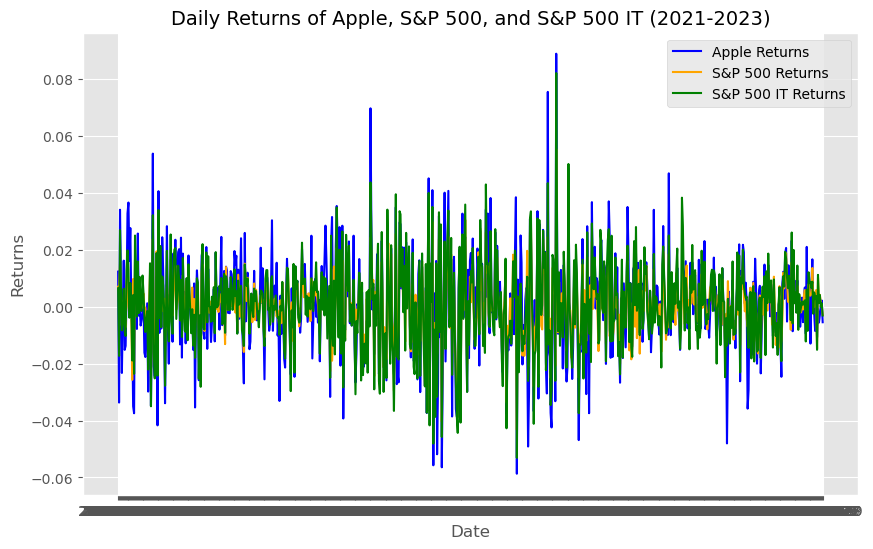

In [24]:
import matplotlib.pyplot as plt

# Use an available style
plt.style.use('ggplot')  

# Plot time-series data
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Apple_Returns'], label='Apple Returns', color='blue')
plt.plot(combined_data.index, combined_data['SP500_Returns'], label='S&P 500 Returns', color='orange')
plt.plot(combined_data.index, combined_data['SP500_IT_Returns'], label='S&P 500 IT Returns', color='green')

# Add titles and labels
plt.title("Daily Returns of Apple, S&P 500, and S&P 500 IT (2021-2023)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Returns", fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import statsmodels.api as sm

# ===== Simple OLS Regression =====
# Independent variable: SP500 Returns
X_simple = combined_data['SP500_Returns']
# Dependent variable: Apple Returns
y = combined_data['Apple_Returns']

# Add a constant (intercept) to the model
X_simple = sm.add_constant(X_simple)

# Fit the regression model
simple_model = sm.OLS(y, X_simple).fit()

# Display the summary
print("\n===== Simple OLS Regression =====")
print(simple_model.summary())



===== Simple OLS Regression =====
                            OLS Regression Results                            
Dep. Variable:          Apple_Returns   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1390.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          6.24e-173
Time:                        13:59:08   Log-Likelihood:                 2369.5
No. Observations:                 752   AIC:                            -4735.
Df Residuals:                     750   BIC:                            -4726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

In [28]:
# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Apple_Returns  SP500_Returns  SP500_IT_Returns
Apple_Returns          1.000000       0.805943          0.876018
SP500_Returns          0.805943       1.000000          0.933453
SP500_IT_Returns       0.876018       0.933453          1.000000


In [30]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming combined_data is your processed dataset with returns
# Create the predictor matrix
X = combined_data[['SP500_Returns', 'SP500_IT_Returns']]

# Add a constant for the intercept
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF) for Predictors:")
print(vif_data)


Variance Inflation Factor (VIF) for Predictors:
           Variable       VIF
0             const  1.002338
1     SP500_Returns  7.772100
2  SP500_IT_Returns  7.772100


In [32]:
print("Columns in combined_data:", combined_data.columns)


Columns in combined_data: Index(['Apple_Returns', 'SP500_Returns', 'SP500_IT_Returns'], dtype='object')


In [34]:
# ===== Multiple OLS Regression =====
# Independent variables: SP500 Returns and SP500 IT Returns
X_multiple = combined_data[['SP500_Returns', 'SP500_IT_Returns']]
# Dependent variable: Apple Returns
y = combined_data['Apple_Returns']

# Add a constant (intercept) to the model
X_multiple = sm.add_constant(X_multiple)

# Fit the regression model
multiple_model = sm.OLS(y, X_multiple).fit()

# Display the summary
print("\n===== Multiple OLS Regression =====")
print(multiple_model.summary())


===== Multiple OLS Regression =====
                            OLS Regression Results                            
Dep. Variable:          Apple_Returns   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1243.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.08e-238
Time:                        13:59:21   Log-Likelihood:                 2525.4
No. Observations:                 752   AIC:                            -5045.
Df Residuals:                     749   BIC:                            -5031.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

In [36]:
# Residuals from the simple regression
residuals_simple = simple_model.resid

# Residuals from the multiple regression
residuals_multiple = multiple_model.resid


In [38]:
from scipy.stats import jarque_bera

jb_test_simple = jarque_bera(residuals_simple)
jb_test_multiple = jarque_bera(residuals_multiple)

print("Jarque-Bera Test for Simple Regression:", jb_test_simple)
print("Jarque-Bera Test for Multiple Regression:", jb_test_multiple)


Jarque-Bera Test for Simple Regression: SignificanceResult(statistic=329.2988288682313, pvalue=3.1165052487790823e-72)
Jarque-Bera Test for Multiple Regression: SignificanceResult(statistic=153.56183080365957, pvalue=4.513070579913583e-34)


In [40]:
from statsmodels.stats.stattools import durbin_watson

dw_stat_simple = durbin_watson(residuals_simple)
dw_stat_multiple = durbin_watson(residuals_multiple)

print("Durbin-Watson for Simple Regression:", dw_stat_simple)
print("Durbin-Watson for Multiple Regression:", dw_stat_multiple)


Durbin-Watson for Simple Regression: 1.8453927398290495
Durbin-Watson for Multiple Regression: 1.9158310974958823


In [42]:
from statsmodels.stats.api import het_white

# Robust covariance matrix
robust_cov = multiple_model.get_robustcov_results(cov_type="HAC", maxlags=1)
print(robust_cov.summary())


                            OLS Regression Results                            
Dep. Variable:          Apple_Returns   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     931.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          7.85e-204
Time:                        08:39:25   Log-Likelihood:                 2525.4
No. Observations:                 752   AIC:                            -5045.
Df Residuals:                     749   BIC:                            -5031.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.914e-06      0.000  

In [44]:
from arch import arch_model

# Fit GARCH(1,1) model
residuals_hac = multiple_model.resid  # Residuals from the adjusted regression
scaled_residuals_hac = residuals_hac * 100  # Scale residuals for better optimization

garch_model_hac = arch_model(scaled_residuals_hac, vol='Garch', p=1, q=1)
garch_results_hac = garch_model_hac.fit()

print(garch_results_hac.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1715284.261092082
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3095.590090631951
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1183.411581073603
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1370.5534682336702
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1261.7497085208604
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1224.8210608022048
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1155.4260061277664
Iteration:      8,   Func. Count:     53,   Neg. LLF: 996.9167173594652
Iteration:      9,   Func. Count:     59,   Neg. LLF: 1029.6951125816108
Iteration:     10,   Func. Count:     65,   Neg. LLF: 984.9868031416943
Iteration:     11,   Func. Count:     71,   Neg. LLF: 959.7513084994887
Iteration:     12,   Func. Count:     77,   Neg. LLF: 938.672728439954
Iteration:     13,   Func. Count:     83,   Neg. LLF: 932.7711014256965
Iteration:     14,   Func. Count:     88,   Neg. LLF: 932.69

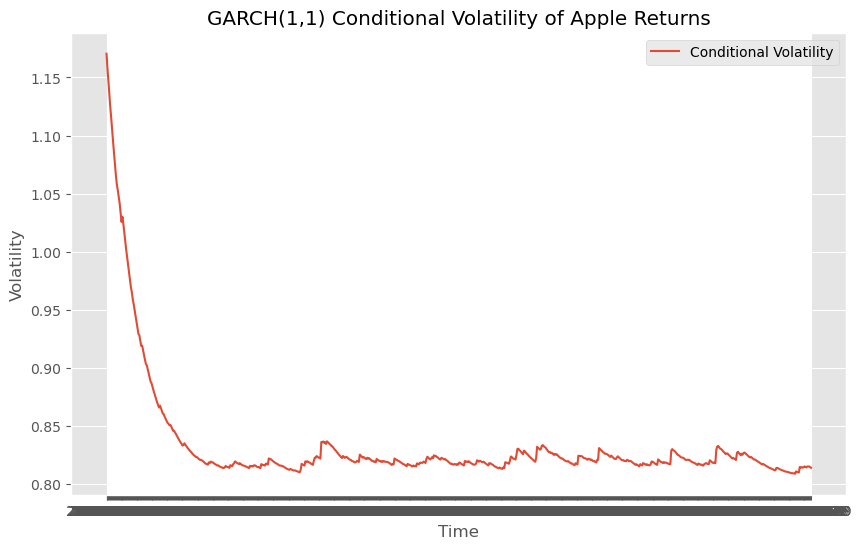

In [46]:
import matplotlib.pyplot as plt

# Plot the conditional volatility
conditional_volatility = garch_results_hac.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(conditional_volatility, label="Conditional Volatility")
plt.title("GARCH(1,1) Conditional Volatility of Apple Returns")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()


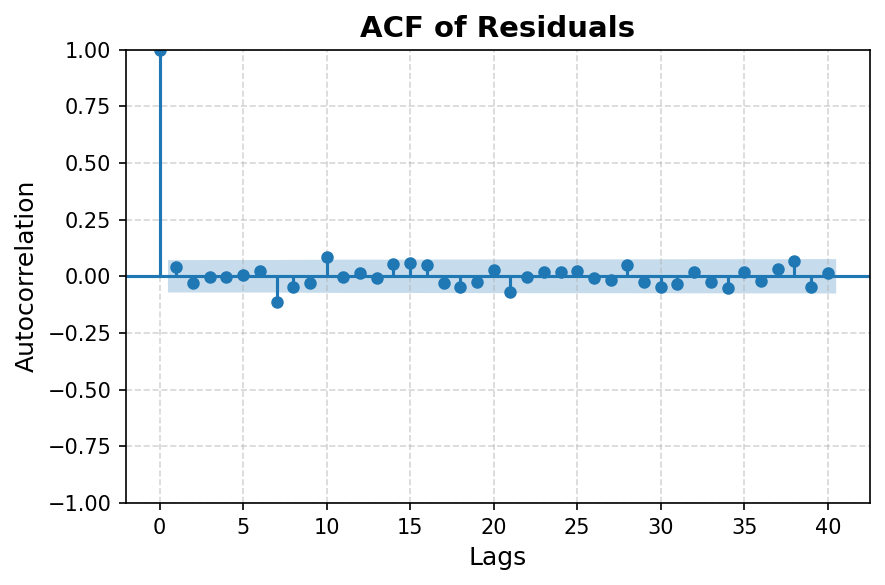

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


plt.style.use('default')

# Plot ACF 
fig, ax = plt.subplots(figsize=(6, 4), dpi=150, facecolor='white')  
plot_acf(residuals_hac, lags=40, alpha=0.05, title="ACF of Residuals", color='tab:blue', ax=ax)

# Refine aesthetics
ax.set_facecolor("white")  # Set axes background to white
plt.grid(True, linestyle='--', alpha=0.5)  
plt.xlabel("Lags", fontsize=12)  
plt.ylabel("Autocorrelation", fontsize=12)  
plt.title("ACF of Residuals", fontsize=14, weight='bold')  
plt.tight_layout()
plt.show()


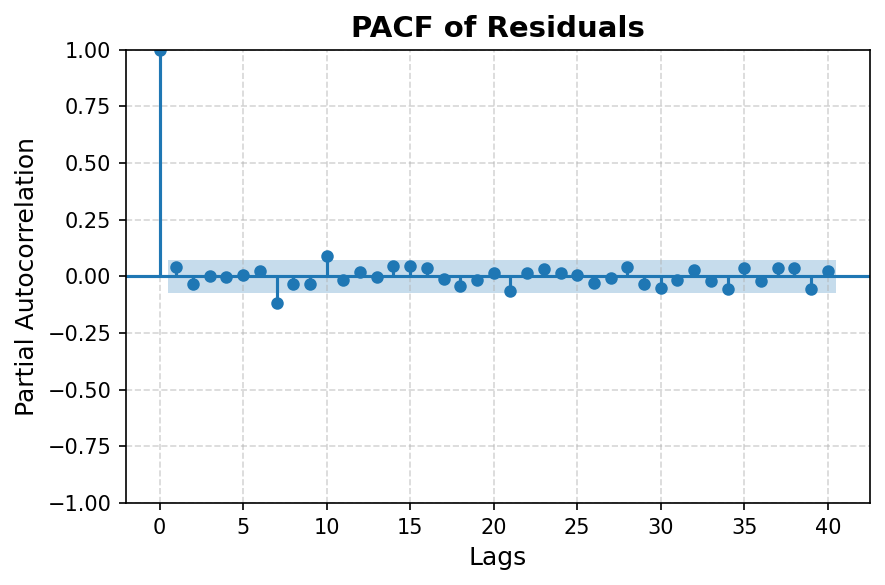

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Set plot style and figure size
plt.style.use('default')  # Default clean style
fig, ax = plt.subplots(figsize=(6, 4), dpi=150, facecolor='white')  # White figure background

# Plot PACF with clean aesthetics
plot_pacf(residuals_hac, lags=40, alpha=0.05, title="PACF of Residuals", color='tab:blue', ax=ax)

# Customize aesthetics
ax.set_facecolor("white")  # Set axes background to white
plt.grid(True, linestyle='--', alpha=0.5)  # Subtle gridlines
plt.xlabel("Lags", fontsize=12)  # X-axis label
plt.ylabel("Partial Autocorrelation", fontsize=12)  # Y-axis label
plt.title("PACF of Residuals", fontsize=14, weight='bold')  # Improved title
plt.tight_layout()
plt.show()


In [64]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to residuals
arima_model = ARIMA(residuals_hac, order=(1, 0, 1))
arima_results = arima_model.fit()

print(arima_results.summary())


C:\Users\shatakshi bansode\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shatakshi bansode\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shatakshi bansode\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  752
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2526.281
Date:                Tue, 17 Dec 2024   AIC                          -5044.562
Time:                        09:59:20   BIC                          -5026.071
Sample:                             0   HQIC                         -5037.438
                                - 752                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.934e-18      0.000  -3.14e-14      1.000      -0.001       0.001
ar.L1         -0.4508      0.539     -0.836      0.403      -1.507       0.606
ma.L1          0.4976      0.527      0.944      0.3

C:\Users\shatakshi bansode\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# 1. OLS captures linear relationships.
# 2. ARIMA ensures that residuals are white noise.
# 3. GARCH captures volatility clustering, which is a key feature of financial returns.
# 4. Model selection was based on AIC, BIC, and volatility clustering.